Problema de negócio: com dados históricos das vendas de 2023, é possível prever as vendas de 2024?

In [11]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

### Pré-processamento e tratamento dos dados

In [ ]:
# carregamento dos dados
df = pd.read_csv("dataset.csv")
df.info()

Sempre temos que convertar a data para índice, pois ela não será um dado a ser analisado, ela apenas demonstra o tempo do total de vendas. Transformamos a coluna para tipo data e depois colocamos como índice.

In [8]:
# converte a coluna para data
df['Data'] = pd.to_datetime(df['Data'])

In [ ]:
# criar uma série temporal (transformando a data em index, ela não pode ser um campo)
series = df.set_index('Data')['Total_Vendas']
series.head()

In [10]:
# explicitar a frequência da série temporal
series = series.asfreq('D')  # dias

### Análise exploratória

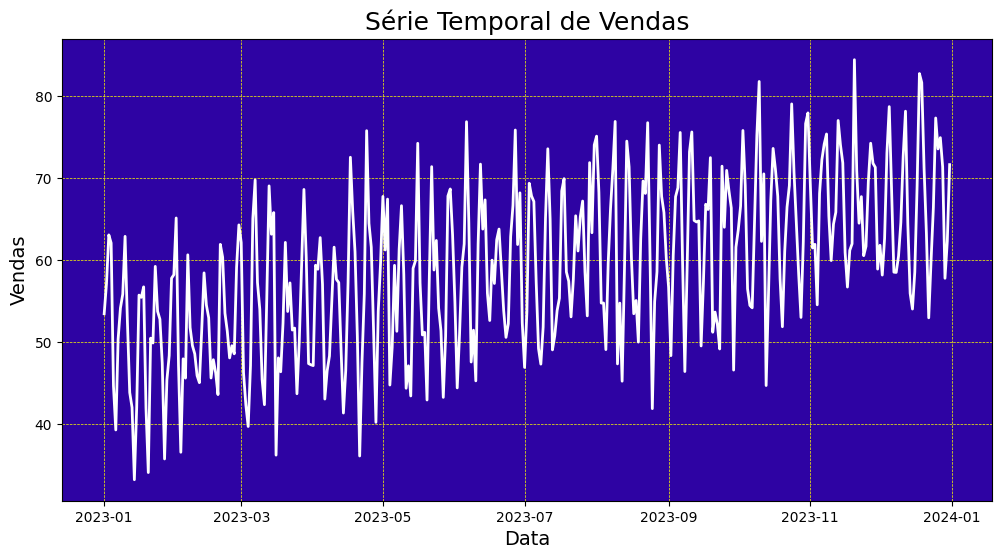

In [13]:
# gráfico

# Criar o gráfico da série temporal com layout de contraste
plt.figure(figsize = (12, 6))
plt.plot(series, color = 'white', linewidth = 2)

# Configurar cores e estilo do gráfico
plt.gca().set_facecolor('#2e03a3')
plt.grid(color = 'yellow', linestyle = '--', linewidth = 0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color = 'black', fontsize = 14)
plt.ylabel('Vendas', color ='black', fontsize = 14)
plt.title('Série Temporal de Vendas', color = 'black', fontsize = 18)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis = 'x', colors  = 'black')
plt.tick_params(axis = 'y', colors = 'black')

plt.show()

### Criação do modelo

### Deploy do modelo